# **What is Supervised Machine Learning?**

Supervised machine learning is a type of machine learning where an algorithm learns from labeled data. Each training example consists of input features and a corresponding output label, allowing the model to make predictions on new data the accuracy depends on the data and the model itself.

### **Applications of Supervised Learning**
Supervised learning is widely used in various fields, such as:
1. **Finance:** Fraud detection, stock price forecasting.
2. **Healthcare:** Disease diagnosis, medical image classification.
3. **Marketing:** Customer churn prediction, targeted recommendations.
4. **Computer Vision:** Object recognition, facial recognition.

### **Required Dataset for Supervised Learning**
A well-structured dataset for supervised learning should have:
1. **Labeled Data:** Each sample must have a corresponding target label or the dependent variable.
2. **Sufficient Size:** More diverse data improves model generalization and accurate results.
3. **Feature-Target Relationship:** The input features should be strongly correlated or relavent to the output.
4. **Data Quality:** cleaned data which can enhance accuracy.



In [1]:
# importing necessary datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 # Data Exploration (Exploritory Data Analysis)

### **here we can see the first few rows and the dimension of the dataset.**

In [206]:
#lets load the data into a dataframe using pandas
df = pd.read_csv('Datasets/diabetes.csv') # df is (Data Frame)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [207]:
shape = df.shape
print(f"the diabetes dataset has {shape[0]} rows and {shape[1]} columns")

the diabetes dataset has 768 rows and 9 columns


## now lets look at the summary of the dataset

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### **Observations**
- **the dataset contains 768 rows and 9 columns**
- **all the columns are full or have 768 non-null values indicating no any missing data**
- **There are two types of data type present in our data set which is (int64) and (float64)**


**There are no missing values in the dataset meaning we don't need any imputation or data cleaning steps before proceeding with further analysis.**

# **Now lets take a look at outliers in each columns and treat them accordingly**

In [209]:
# lets create a function for visualization for re-use as we will use this frequently in our analysis phase
def visualize_distribution(df, column, kde=True, hist_color='skyblue', box_color='lightgreen'):
    plt.rcParams.update({'font.size': 25})

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    # this creates Histogram
    sns.histplot(df[column], kde=kde, ax=axes[0], color=hist_color)
    axes[0].set_title(f"Distribution of {column}")
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis='both', labelsize=20)
    axes[0].grid(True)

    # This creates Boxplot
    sns.boxplot(x=df[column], ax=axes[1], color=box_color)
    axes[1].set_title(f"Boxplot of {column}")
    axes[1].set_xlabel(column)
    axes[1].tick_params(axis='both', labelsize=20)
    axes[1].grid(True)

    #this is to fit the layout and show the figure
    plt.tight_layout()
    plt.show()

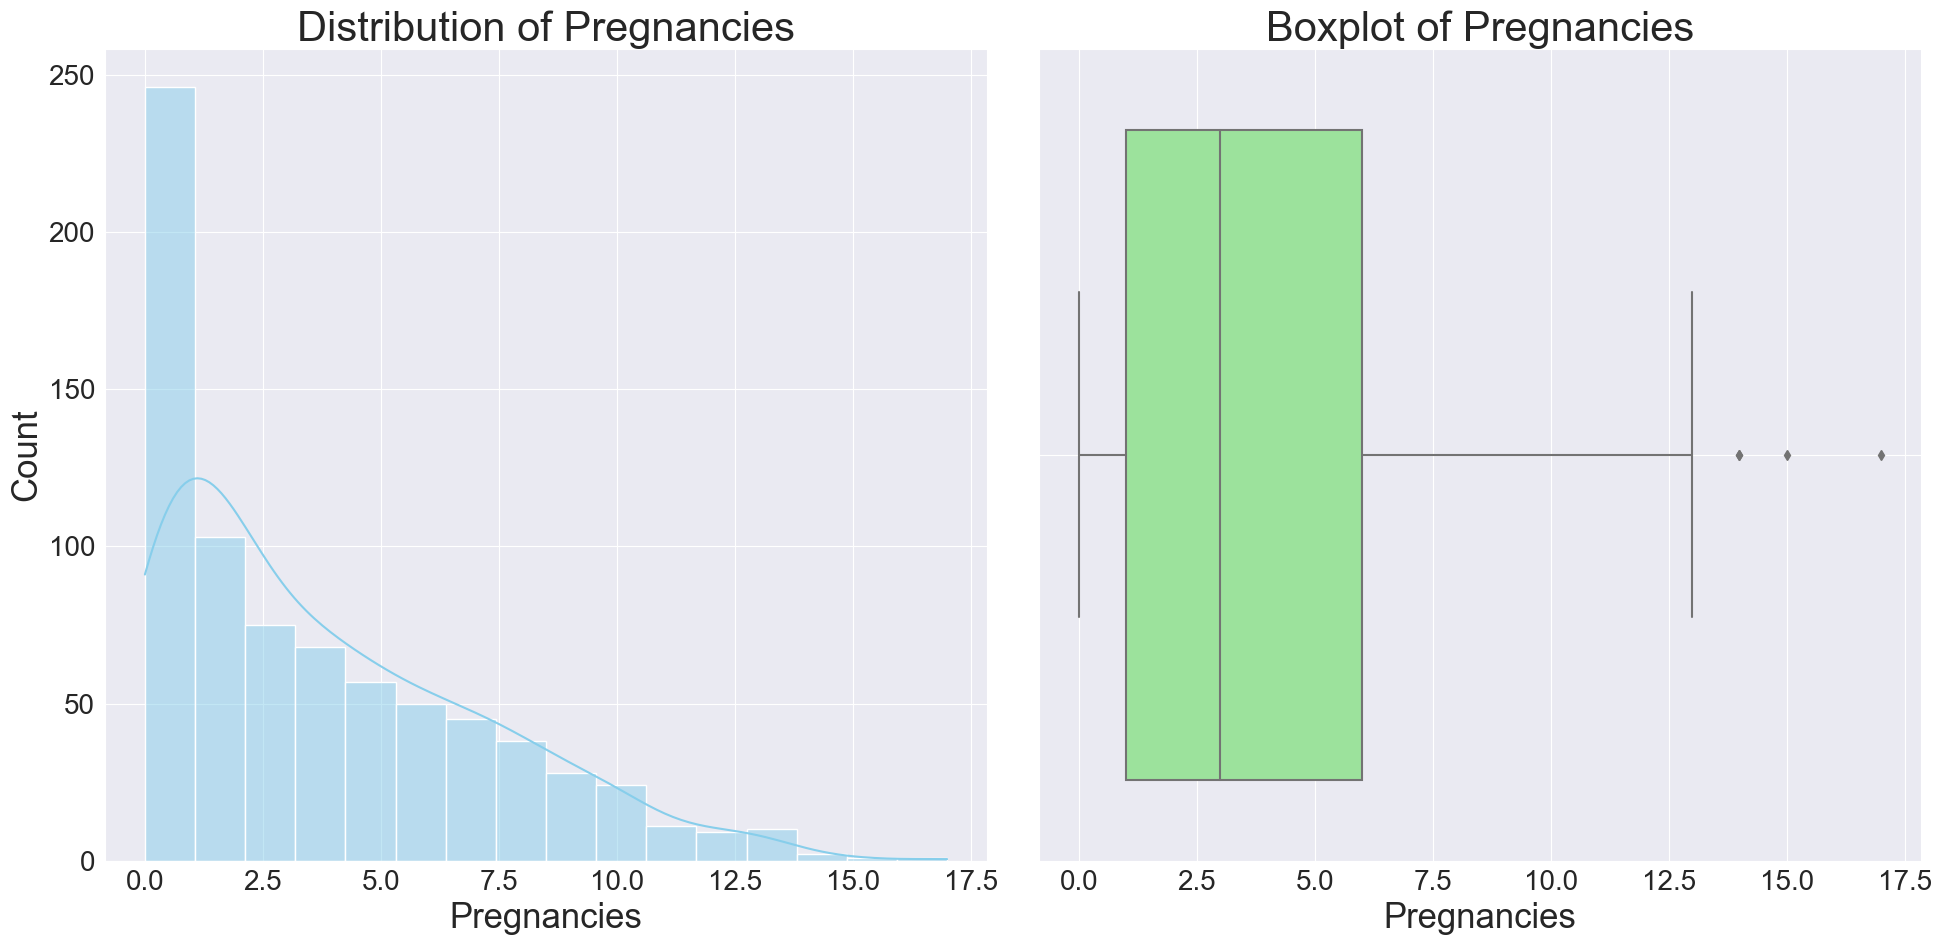

In [210]:
# Lets check for outliers in pregnency column
visualize_distribution(df, 'Pregnancies')

### **From the distribution above it is evident that the Pregnancies column is right-skewed and contains three outliers. To handle these outliers effectively, we will apply the IQR (Interquartile Range) technique. Instead of removing them, we will use capping as these values represent real observations. Removing them could lead to a loss of valuable information. so capping allows us to maintain data integrity while reducing the impact of extreme values.**

In [211]:
# Lets create an advance function to handle outliers for skewed data as well as the data which are normally distributed we will use the IQR method and z-score method to handle the outliers with capping and dropping(id necessary).

def handle_outliers(df, column_name, dist='iqr', z_thresh=3, method='cap'):
    df = df.copy()
    if dist == 'iqr':
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

    elif dist == 'zscore':
        mean = df[column_name].mean()
        std = df[column_name].std()
        lower_limit = mean - z_thresh * std
        upper_limit = mean + z_thresh * std

    else:
        raise ValueError("Invalid 'dist' value. Choose 'iqr' or 'zscore'.")

    if method == 'cap':
        df[column_name] = np.where(
            df[column_name] > upper_limit, upper_limit,
            np.where(df[column_name] < lower_limit, lower_limit, df[column_name])
        )

    elif method == 'drop':
        df = df[(df[column_name] < upper_limit) & (df[column_name] > lower_limit)]

    else:
        raise ValueError("Invalid 'method' value. Choose 'cap' or 'drop'.")

    return df

In [212]:
df = handle_outliers(df, "Pregnancies", dist='iqr', method='cap')

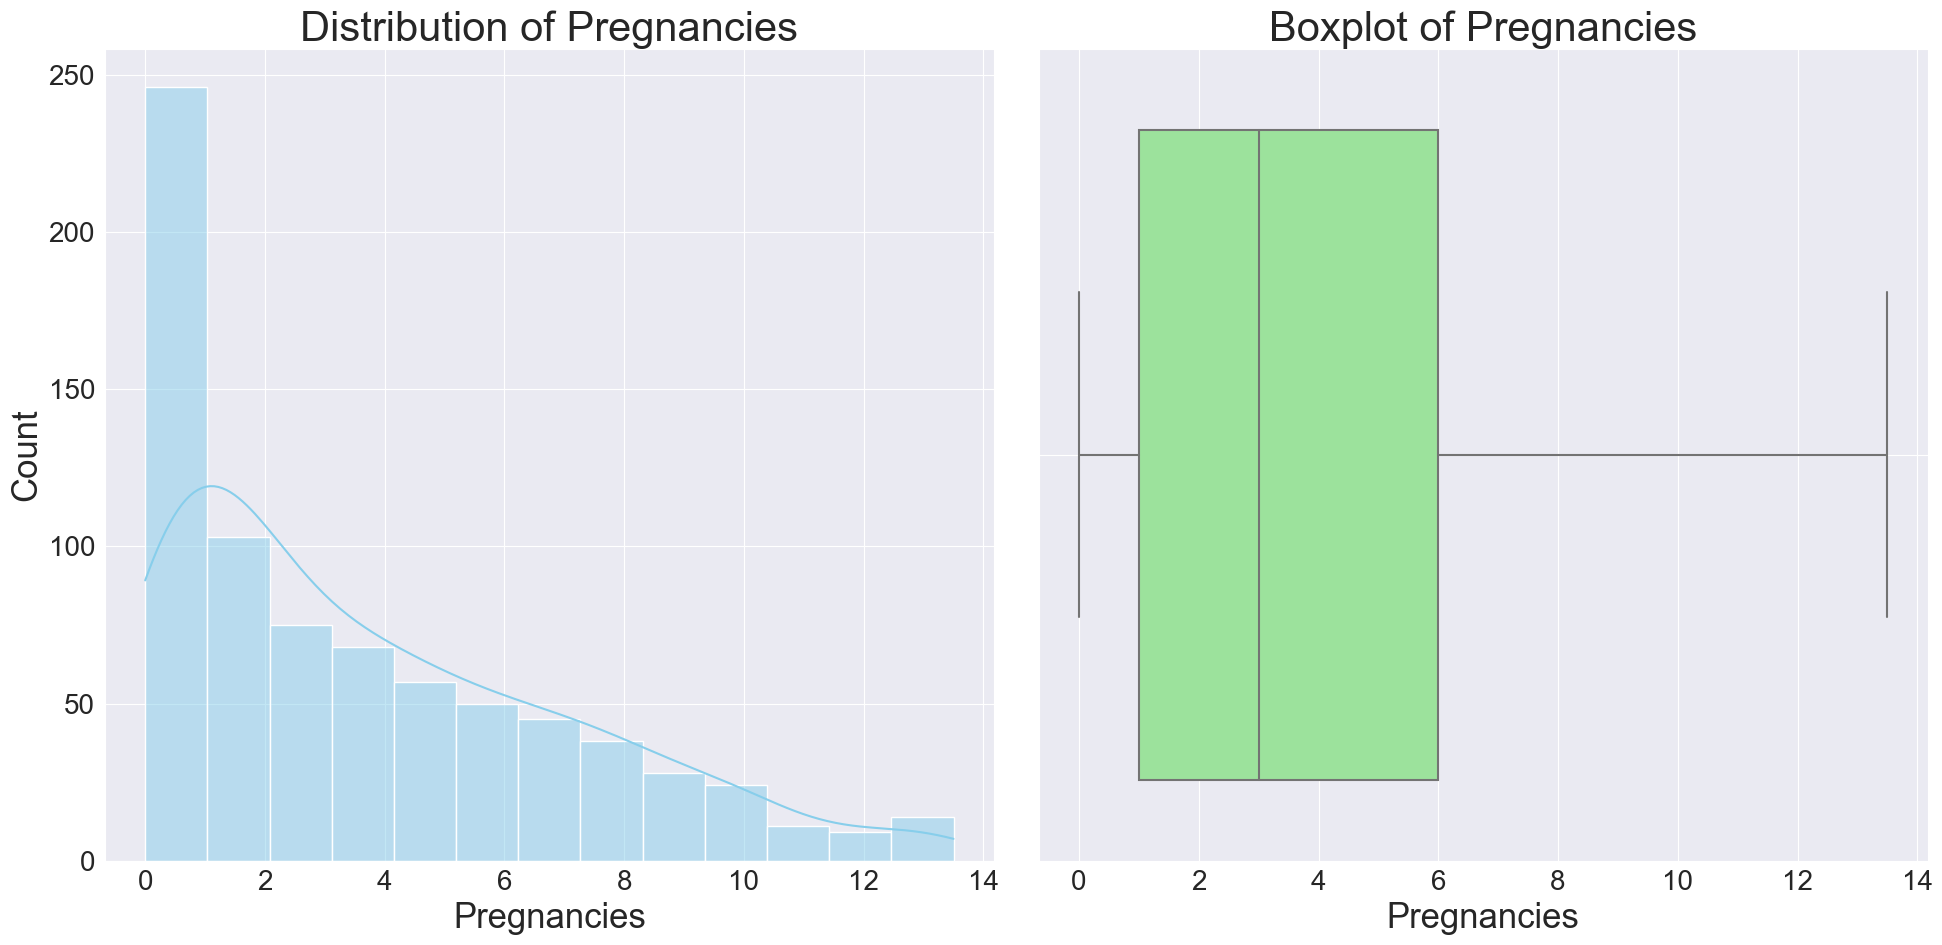

In [213]:
visualize_distribution(df, "Pregnancies")
# No outliers

## 🔍 Handling Outliers for All Columns

**now we will do the same for every column we check there distribution see the number of outlers and treat them accordingly**


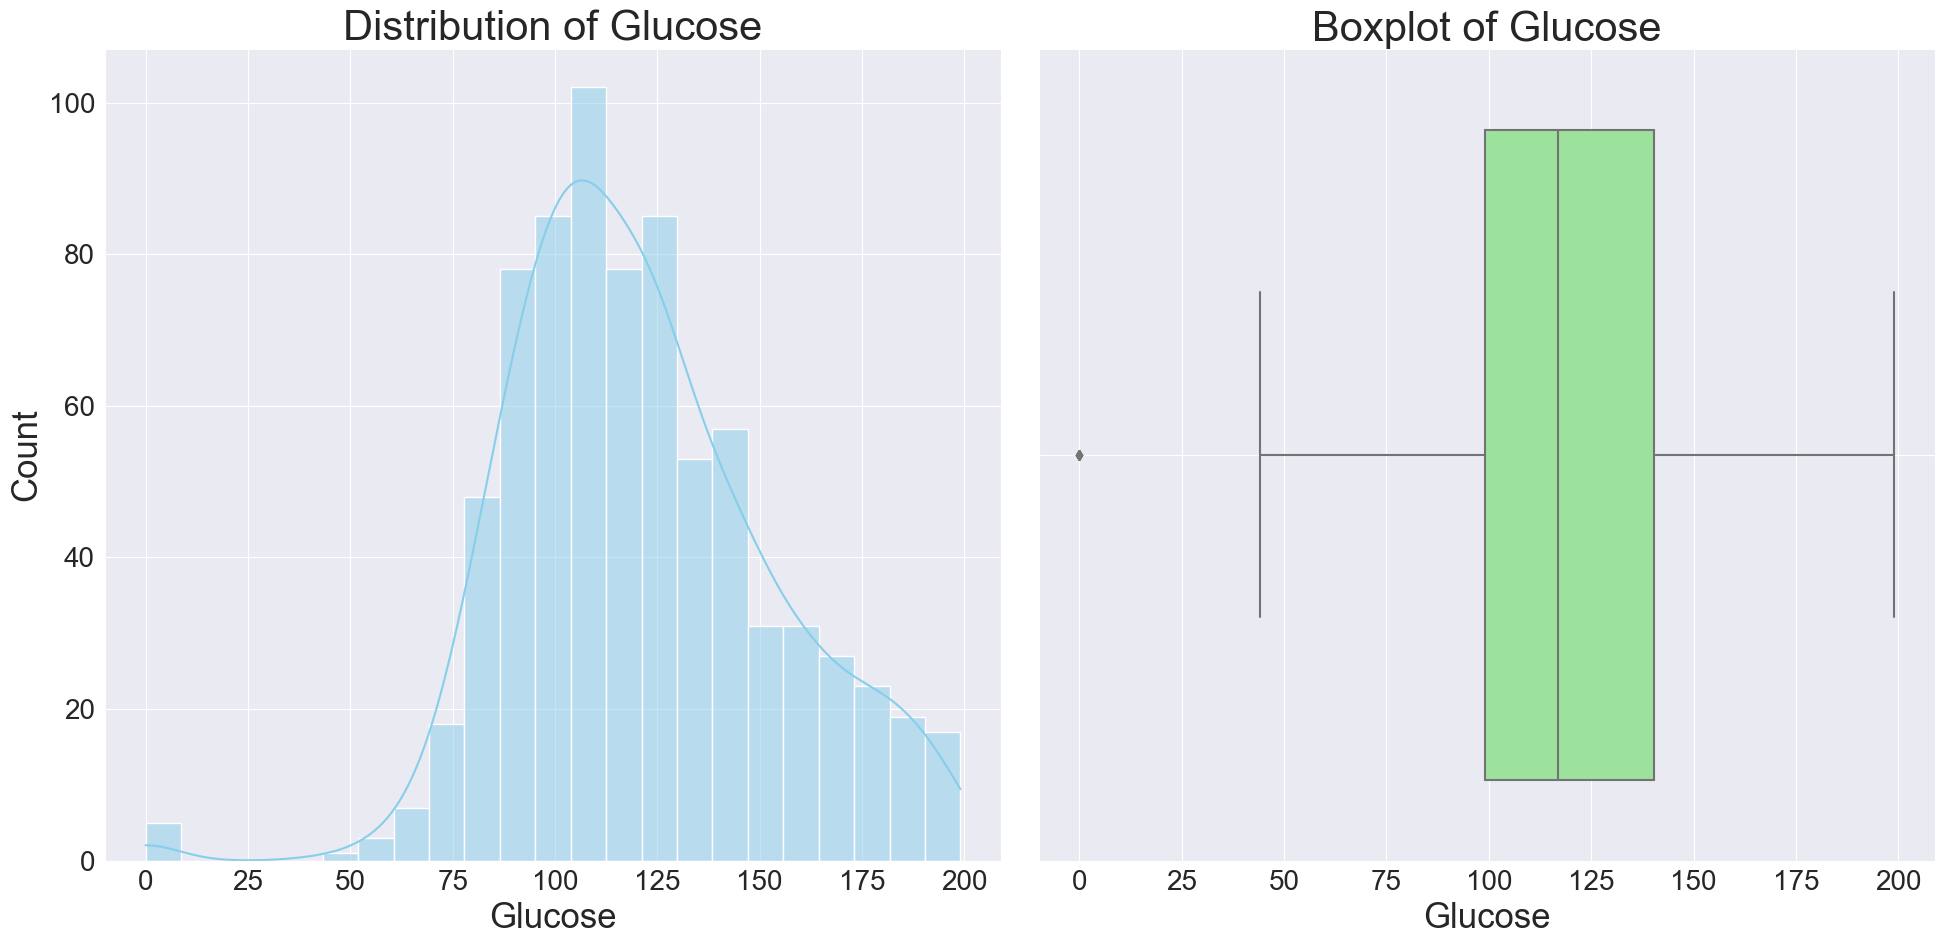

In [214]:
#For Glucose column lets handle the outliers
visualize_distribution(df, 'Glucose')

**Here in this dataset the outlier is unreal cause it shows the Plasma glucose concentration after a 2-hour oral glucose tolerance test (OGTT) is  0 which is unlikely in the real world so this is an error in the data so we will drop these rows.**

In [215]:
# Now lets use our function to drop the outliers using the zcore method cz the data is normally distributed or nearly normally distributed.
df = handle_outliers(df, "Glucose", dist='zscore', method='drop')

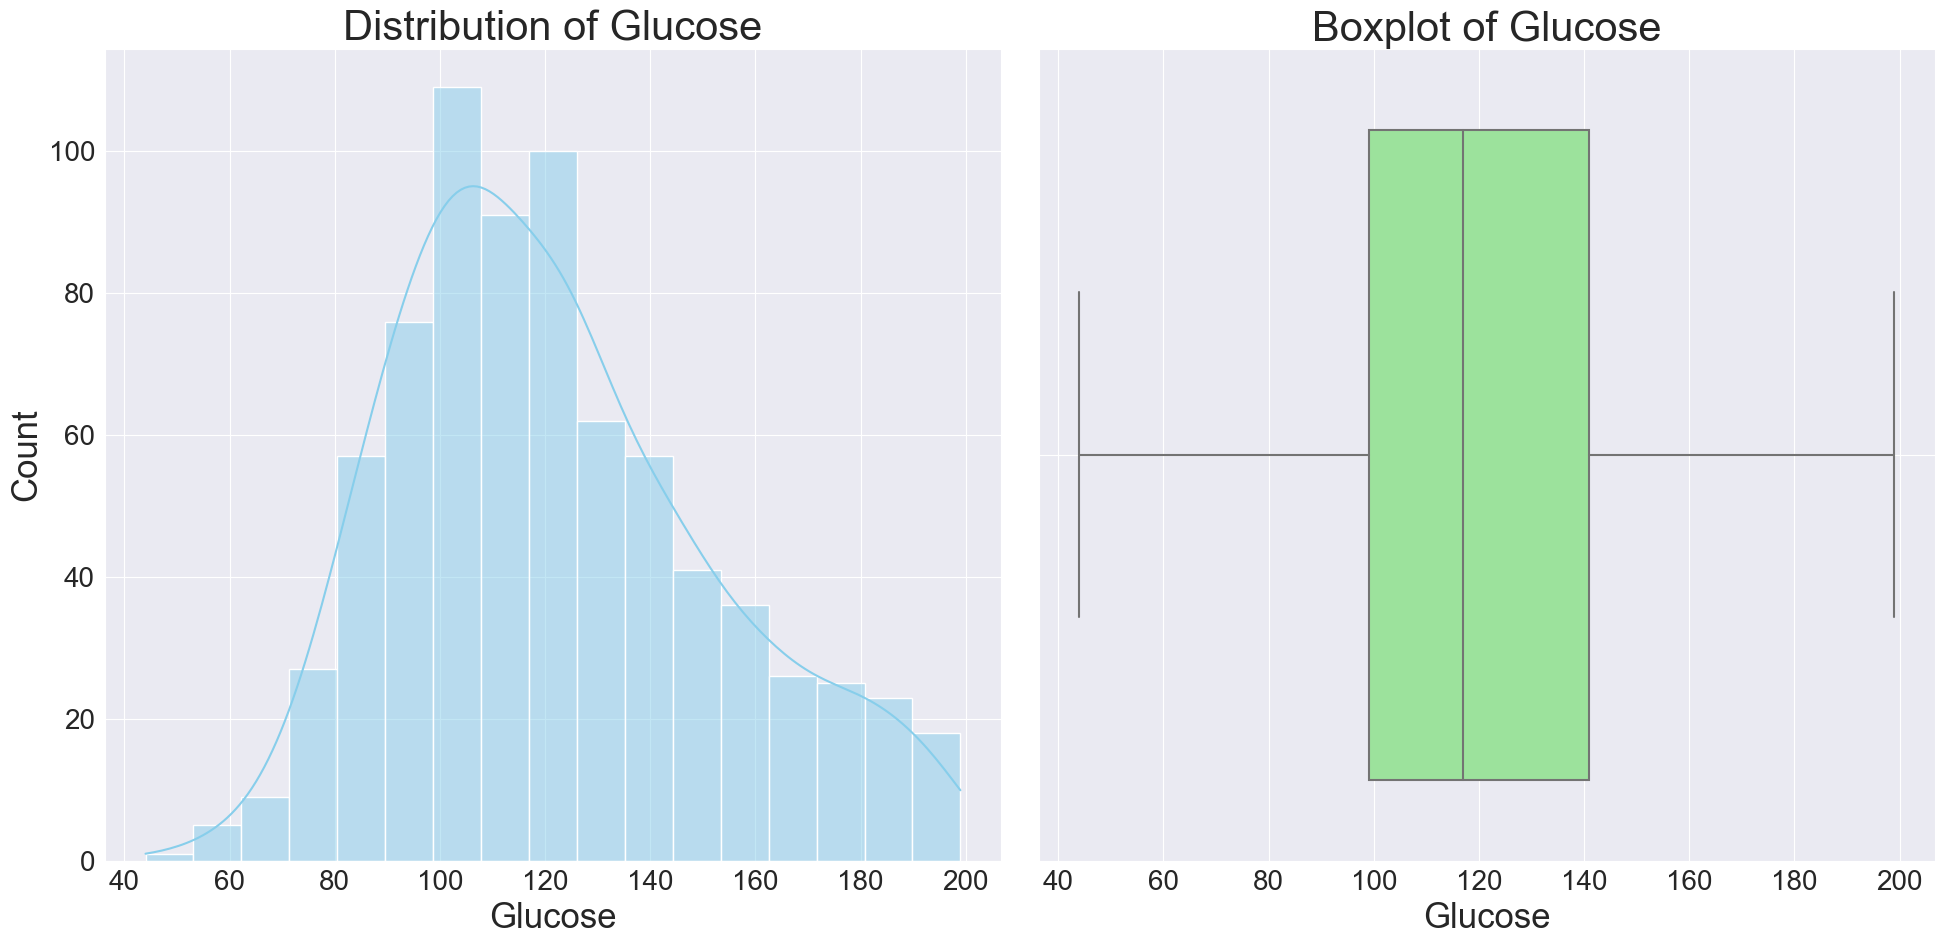

In [216]:
visualize_distribution(df, "Glucose")
#No outliers

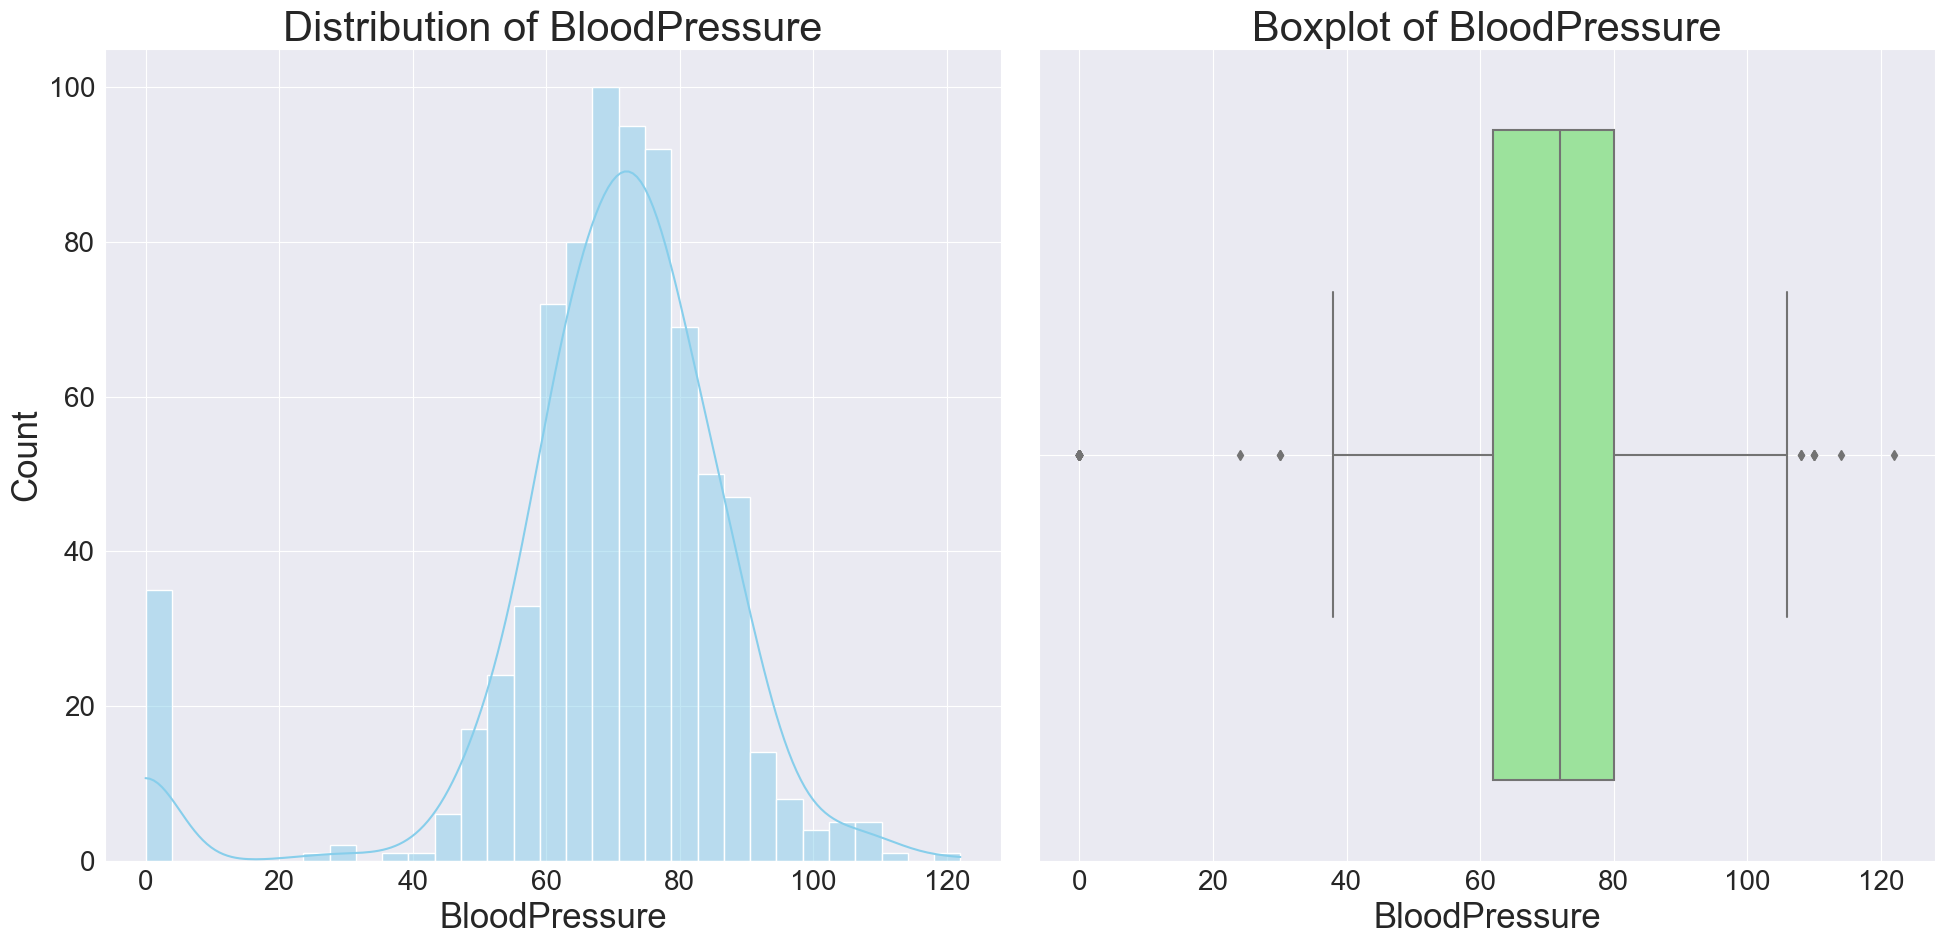

In [217]:
# For blood pressure lets handle the outliers
visualize_distribution(df, 'BloodPressure')

In [218]:
df['BloodPressure'].skew()

-1.8433893509846266

**hmmm, this data is likely seen to be left skewed and the value of the skewness also suggests that the characteristics of the data is left skewed so we will use the IQR method again to analyse and handle the outlier. we will drop the column with zero blood pressure cz 0 blood pressure doesn't exist in real world it might be a missing value or somekind of data entry mistake**

In [219]:
df = handle_outliers(df, 'BloodPressure', dist='iqr', method='cap')

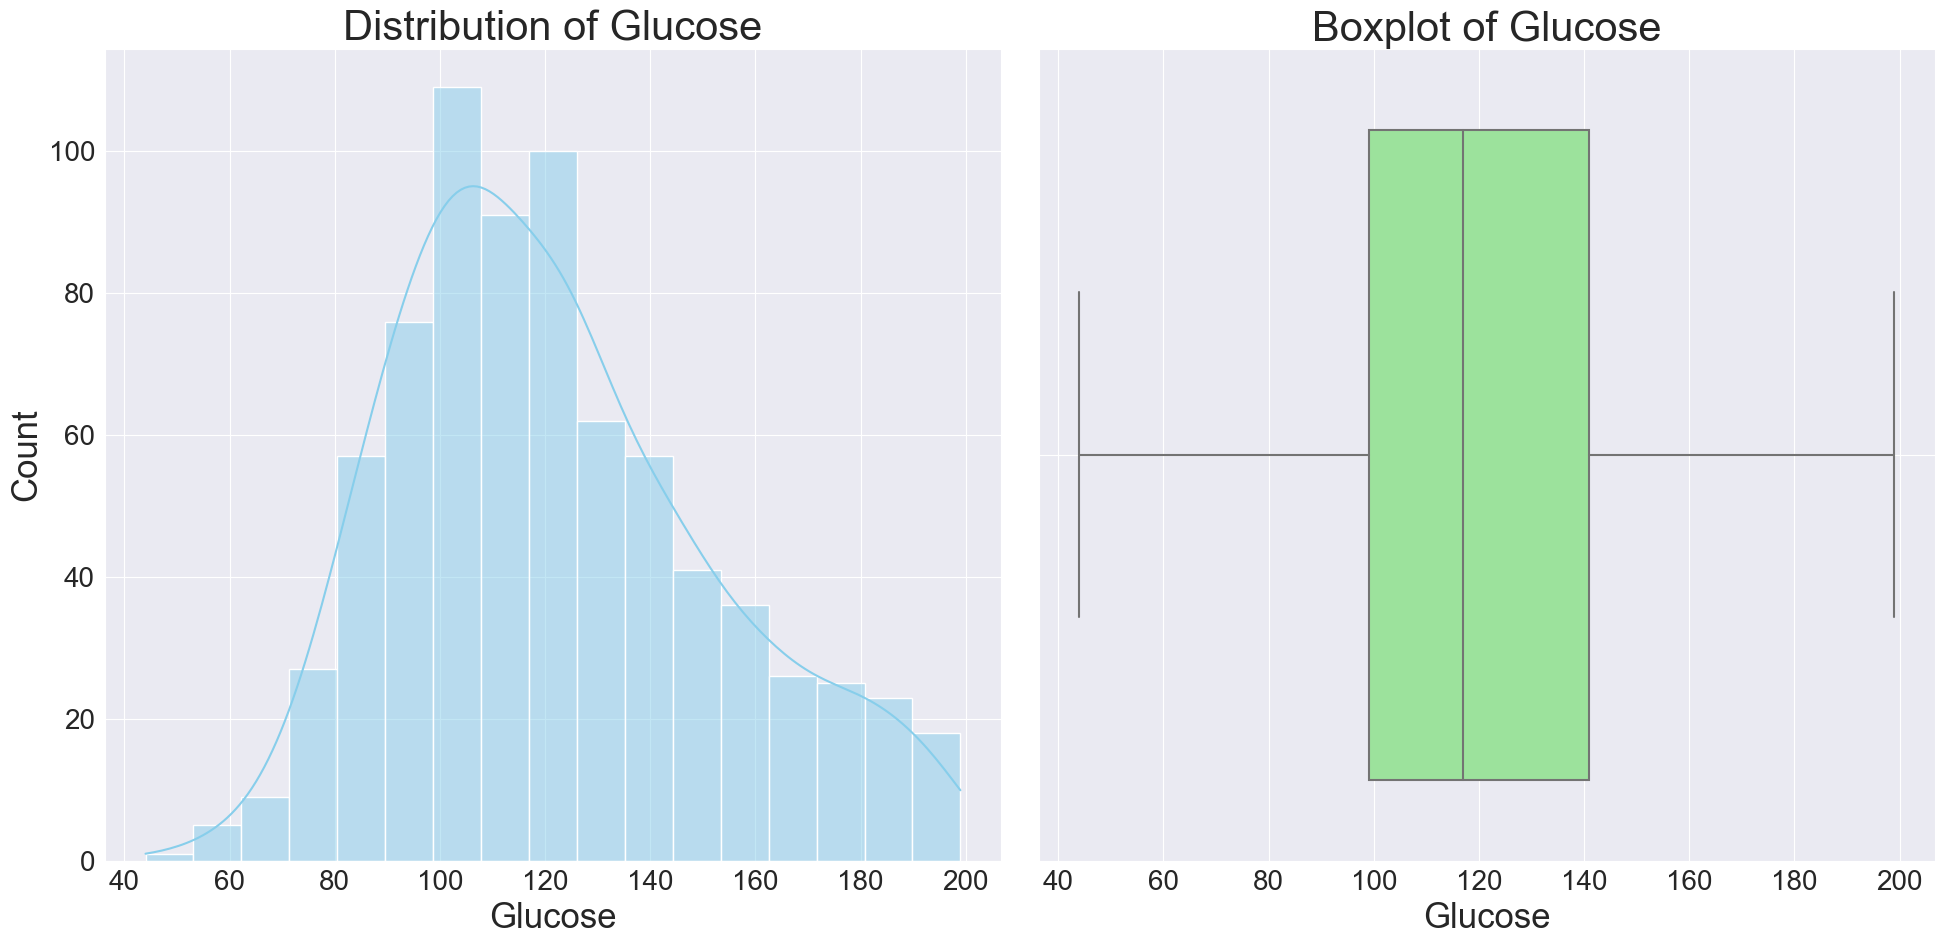

In [220]:
visualize_distribution(df, 'Glucose')
#No outliers

In [221]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

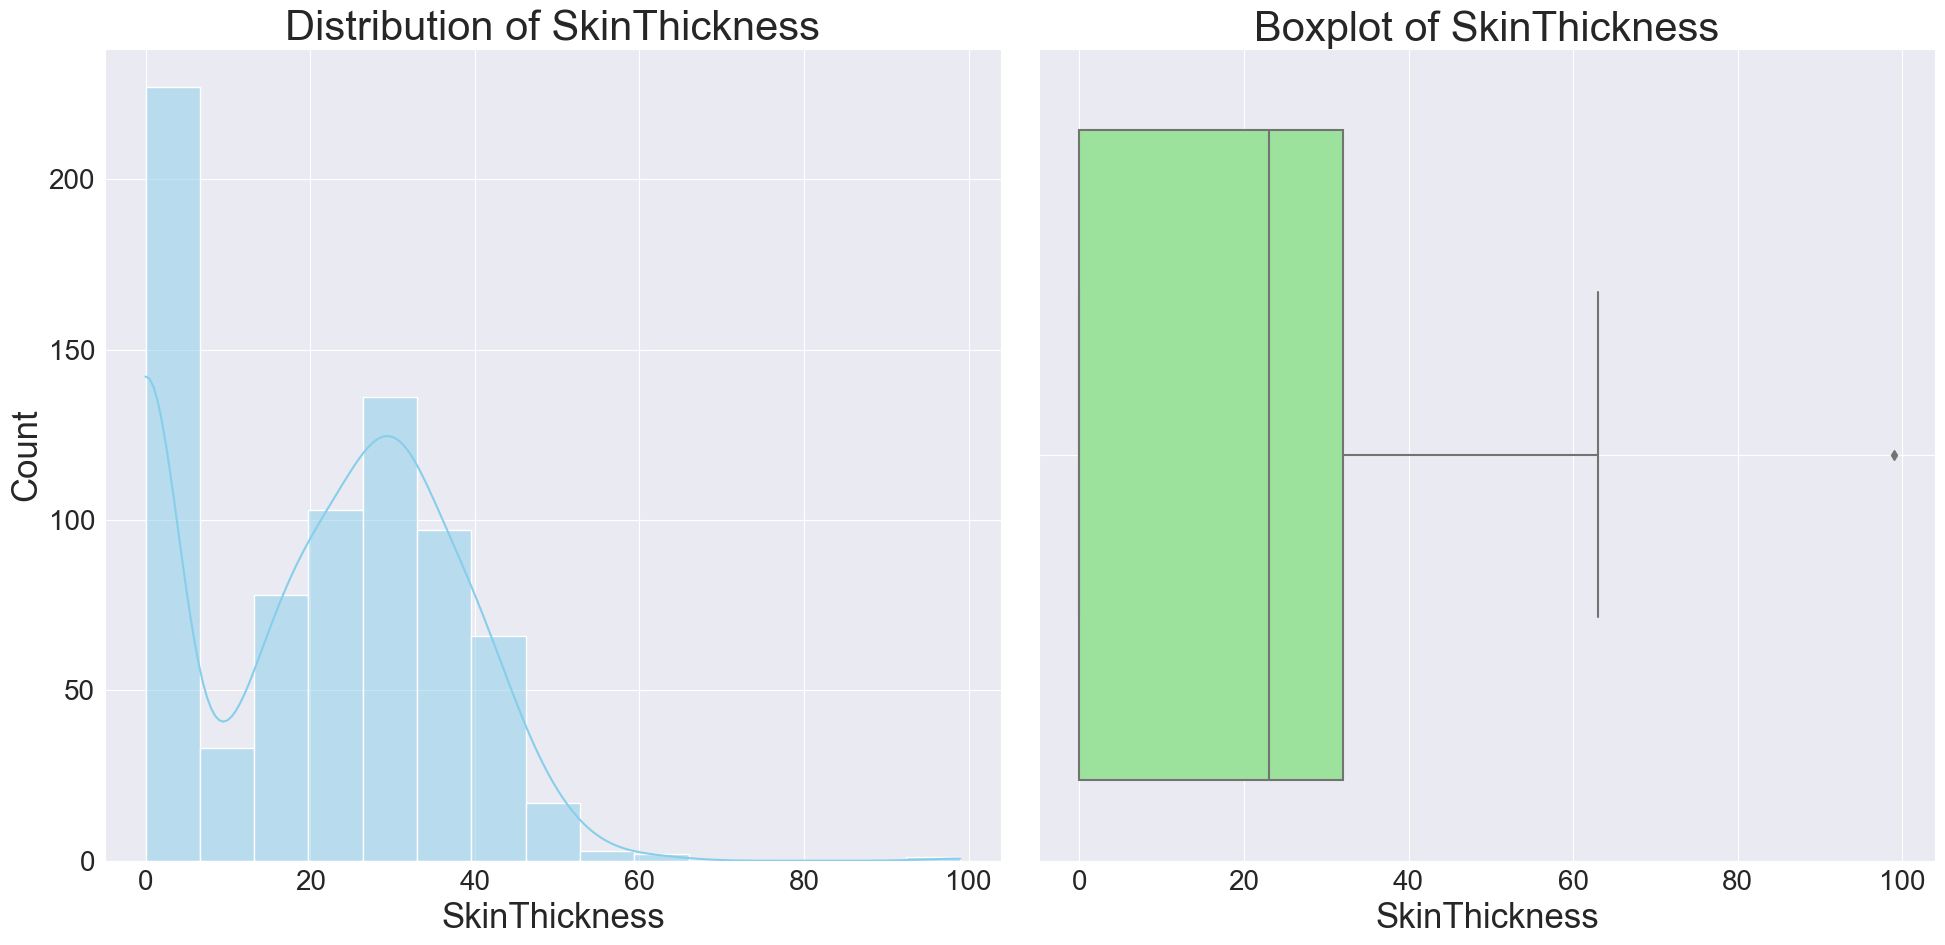

In [222]:
## For skin thickness lets handle the outliers
visualize_distribution(df, 'SkinThickness')

In [223]:
df[df["SkinThickness"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8.0,183,64.0,0,0,23.3,0.672,32,1
5,5.0,116,74.0,0,0,25.6,0.201,30,0
7,10.0,115,35.0,0,0,35.3,0.134,29,0
9,8.0,125,96.0,0,0,0.0,0.232,54,1
10,4.0,110,92.0,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0.0,123,72.0,0,0,36.3,0.258,52,1
758,1.0,106,76.0,0,0,37.5,0.197,26,0
759,6.0,190,92.0,0,0,35.5,0.278,66,1
762,9.0,89,62.0,0,0,22.5,0.142,33,0


**here these 0's in the skin thickness column is likely missing values because having skin thickness of 0 is biologically impossible and the number of missing values of this column is relatively large so we cannot drop them insted we can impute them we can see here that there are outliers so we will use mean imputation. **

In [224]:
mean = df['SkinThickness'].mean()
df['SkinThickness'] = df['SkinThickness'].replace(0, mean)

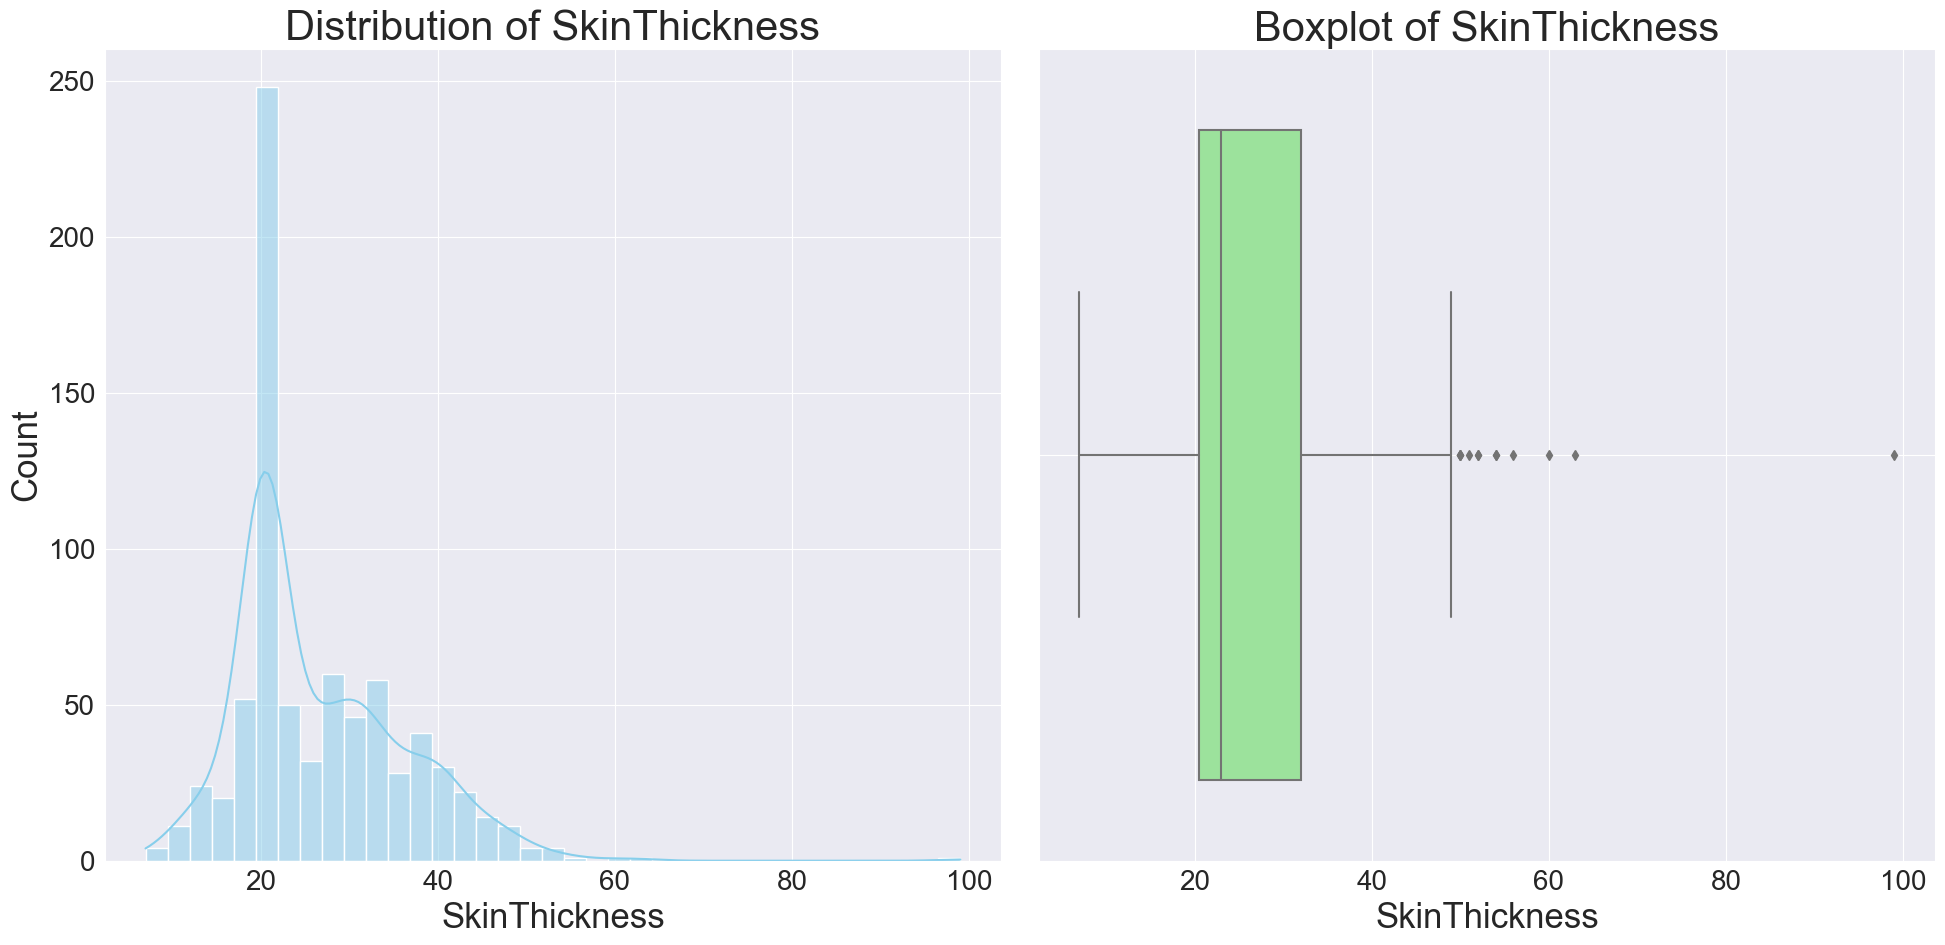

In [225]:
visualize_distribution(df, 'SkinThickness')

**In the above distribution we can clearly see that there are some outliers and the data is right skewed after we remove the missing values. so, we will use the IQR method for outliers handeling.**

In [226]:
df = handle_outliers(df, 'SkinThickness', dist='iqr', method='cap')

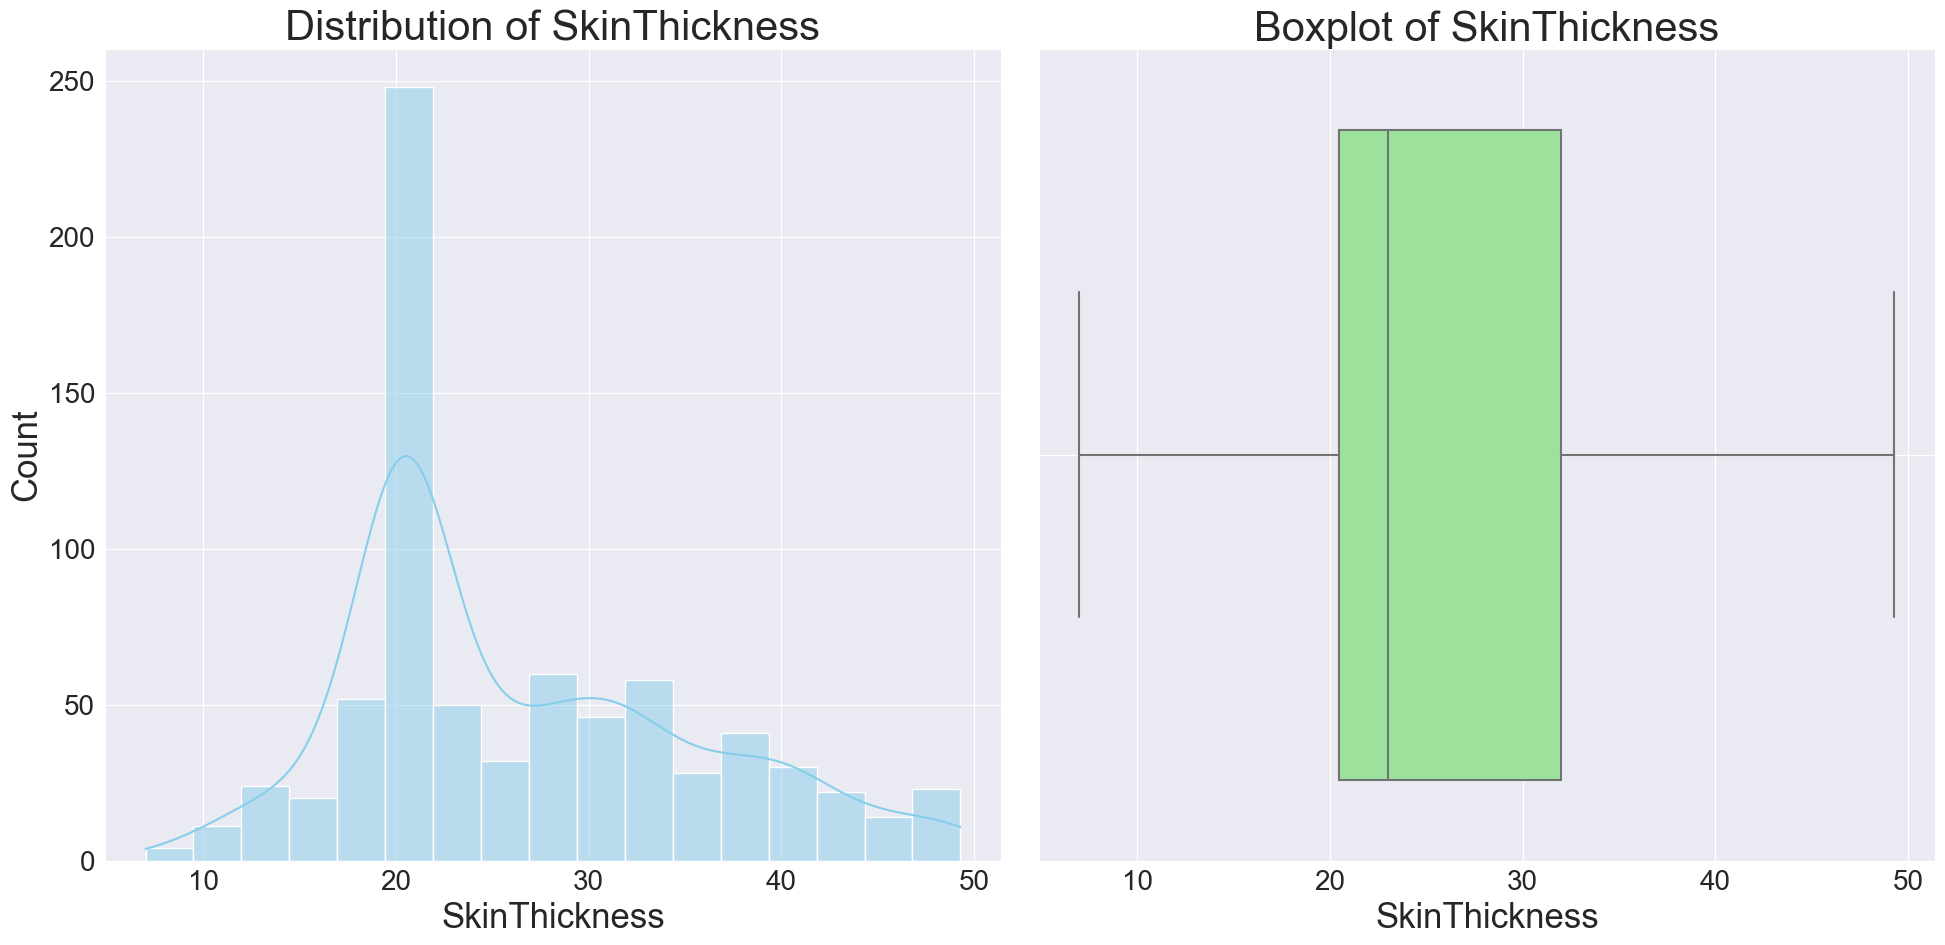

In [227]:
visualize_distribution(df, "SkinThickness")
#No outliers

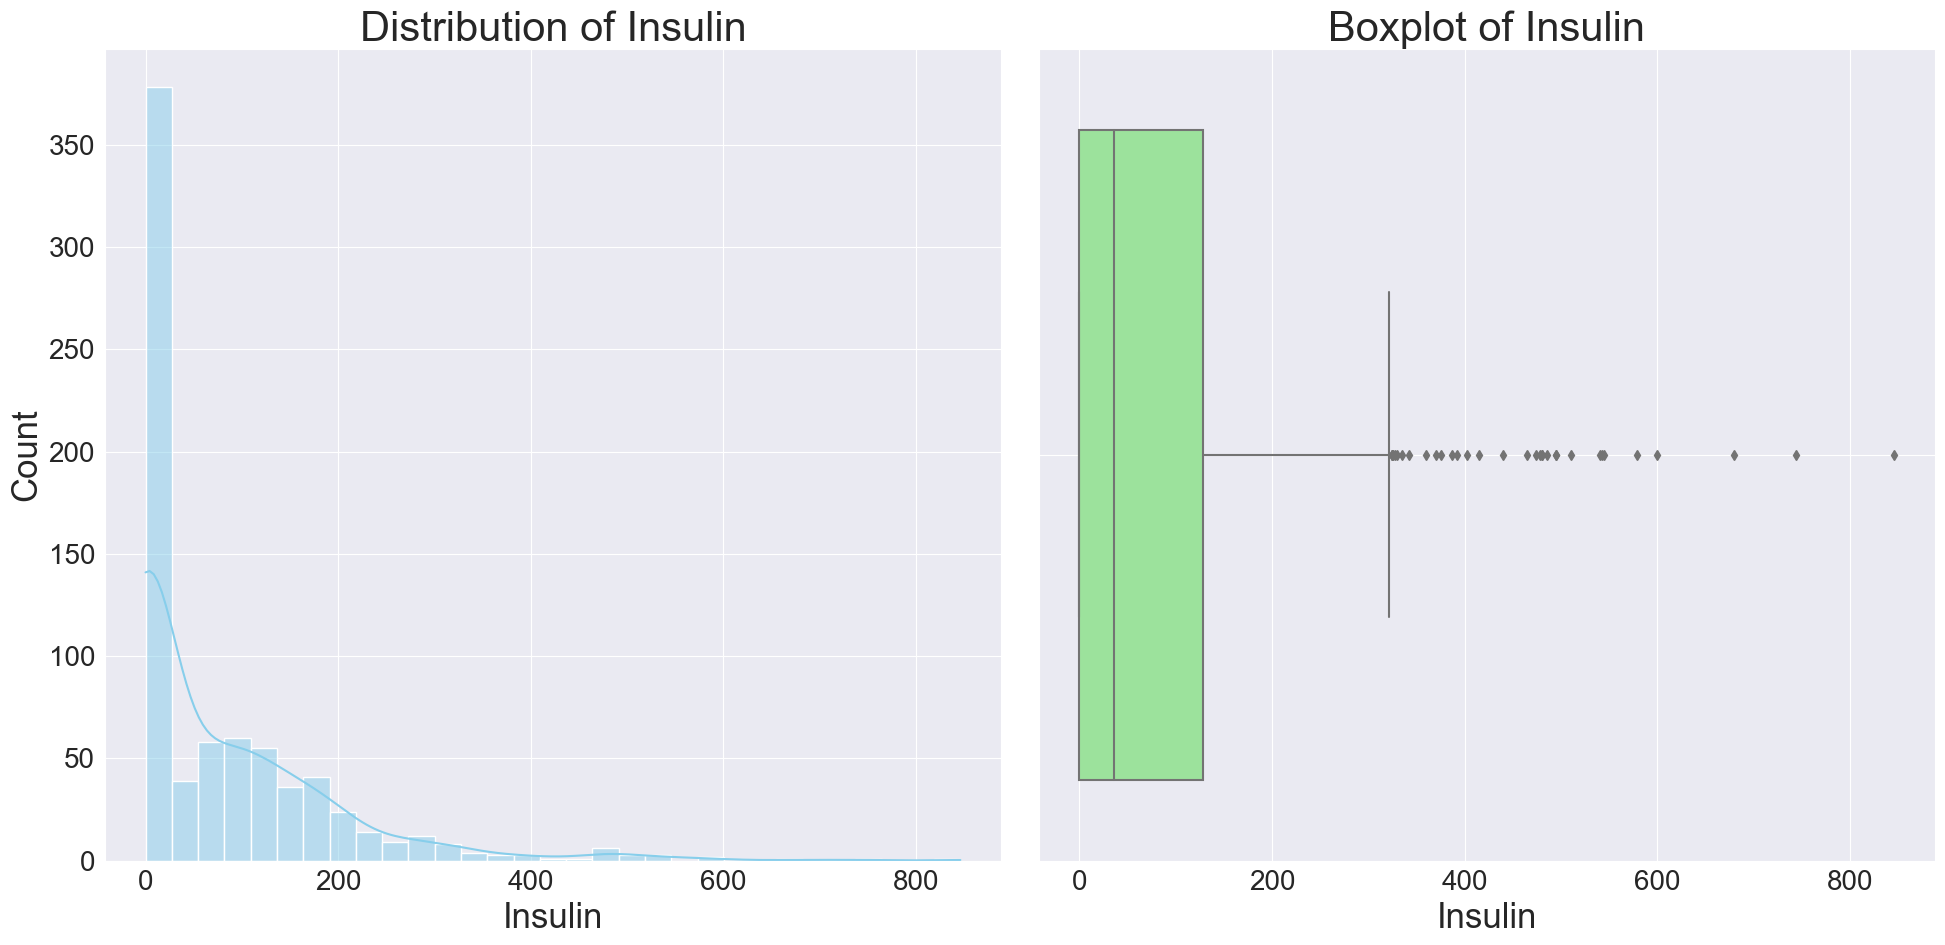

In [228]:
# handeling outliers for the column insulin
visualize_distribution(df, 'Insulin')

In [229]:
# calculating the correlation
df['Insulin'].corr(df['Outcome'])

0.13187004477480418

**The insulin column has lots of missing values and lots of outliers and the correlation is close to 0 which mean it has a weak correlation with the dependent variable i.e (outcome) lets check the feature importance of this column using random forest and see is this column is worth including in the dataset for further analysis if not we will drop it.**

In [230]:
from sklearn.ensemble import RandomForestClassifier

# define features and target
X = df.drop(columns=['Outcome'])  # Drop target variable
y = df['Outcome']

# train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# get the feature importances of every column
importances = rf.feature_importances_
feature_names = X.columns

# Print the values
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))


                    Feature  Importance
1                   Glucose    0.269499
5                       BMI    0.168529
6  DiabetesPedigreeFunction    0.127404
7                       Age    0.126397
2             BloodPressure    0.088436
0               Pregnancies    0.084964
3             SkinThickness    0.071358
4                   Insulin    0.063414


**as we can see the Insulin column contributes least and has very low importance then the features such as Glucose, BMI etc so it is safe to drop this column.**

In [231]:
df.drop(columns=['Insulin'], inplace=True, axis=1)

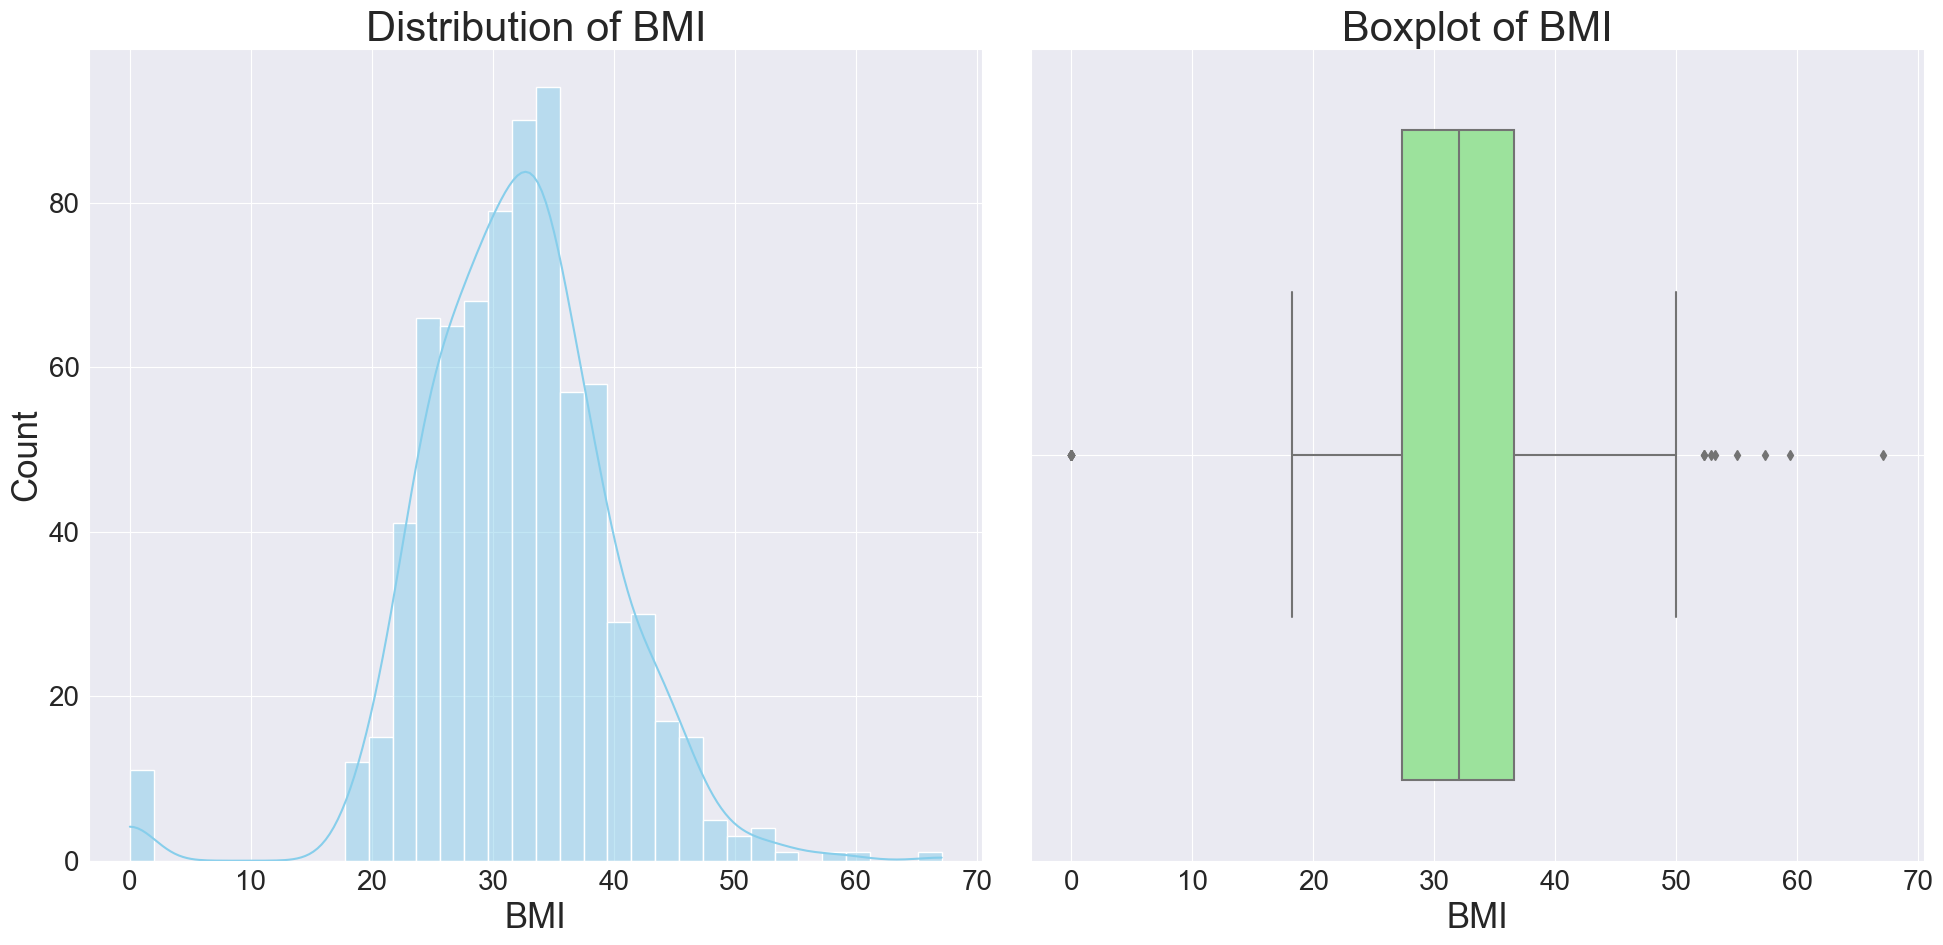

In [232]:
#handeling outliers for BMI
visualize_distribution(df, "BMI")

**11 abservations have 0 BMI which is again not possible and is likely a missing value so we will impute the missing values with median due to presence of outliers in the dataset and we will handle the outliers.**

In [233]:
median = df["BMI"].median()
df["BMI"].replace(0, median, inplace=True)

In [234]:
df["BMI"].skew()

0.6039534602011878

**here we can see that the skewness of this data is 0.60 which means slightly outside the normal range, the data is moderately right-skewed  i.e symmetrically distributed so we will use the iqr method to handle the outliers in the dataset.**

In [235]:
df = handle_outliers(df, "BMI", dist='iqr', method='cap')

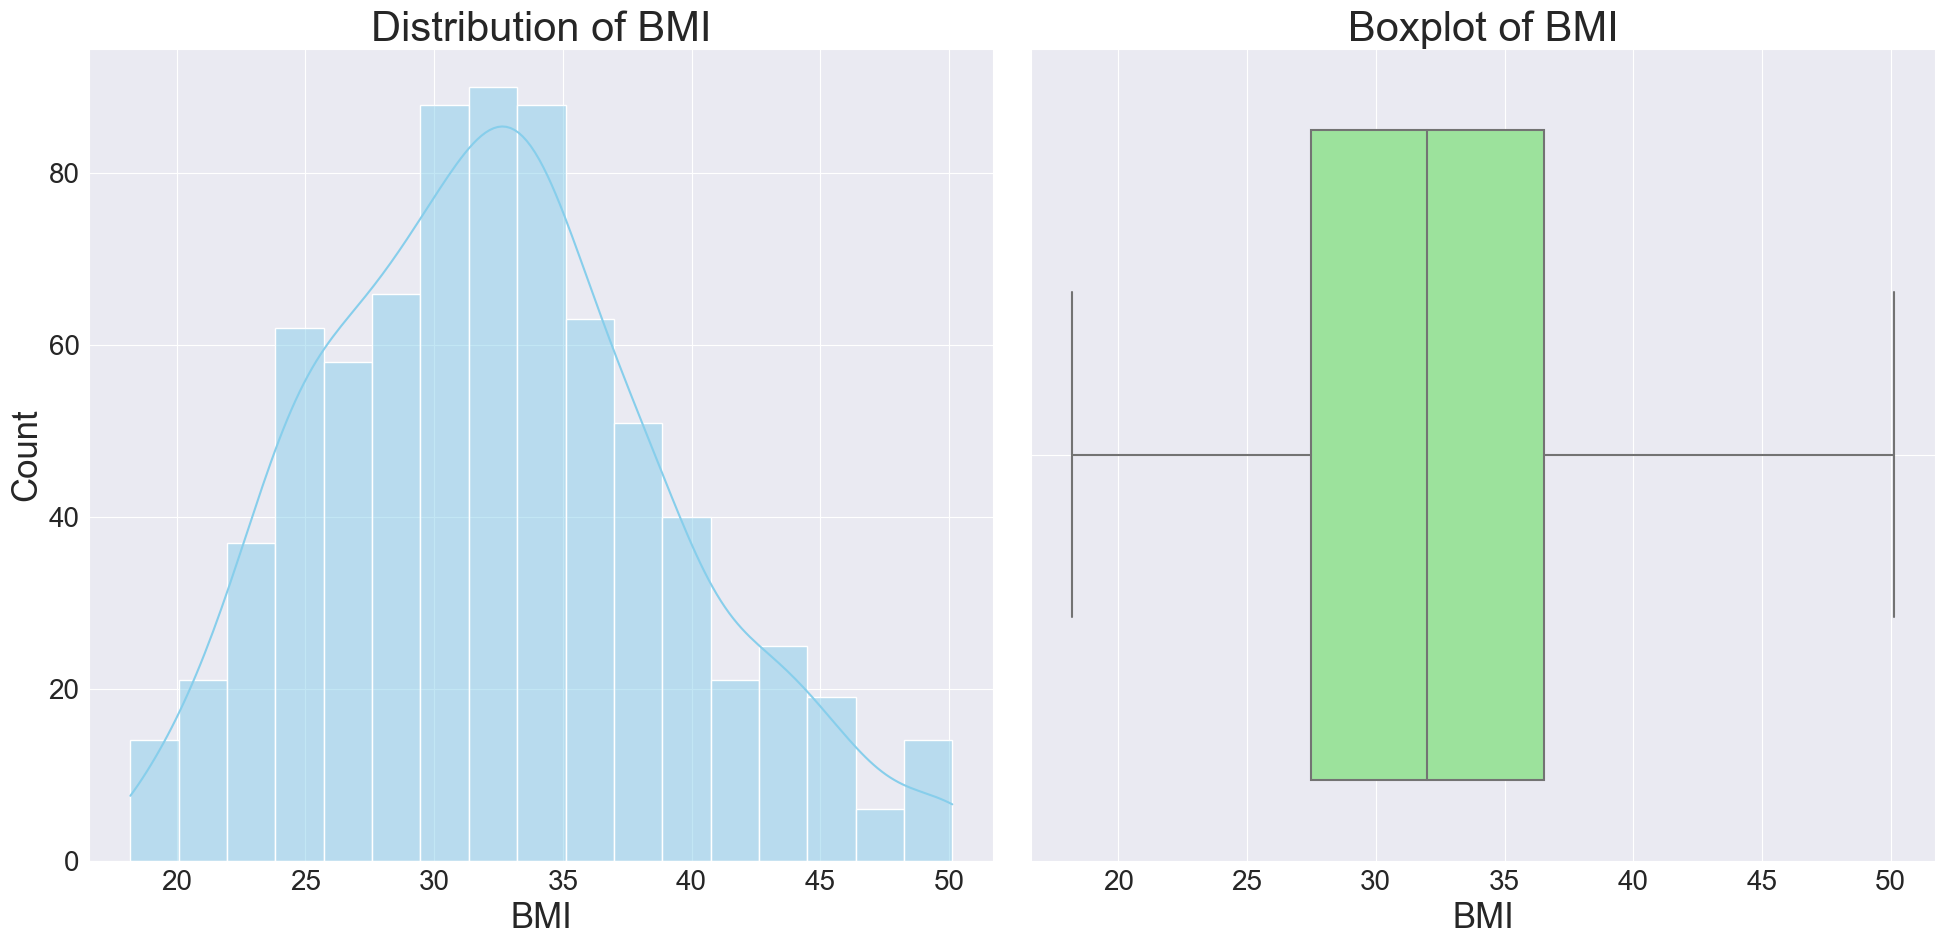

In [236]:
visualize_distribution(df, "BMI")
#No outliers and normally distributed data

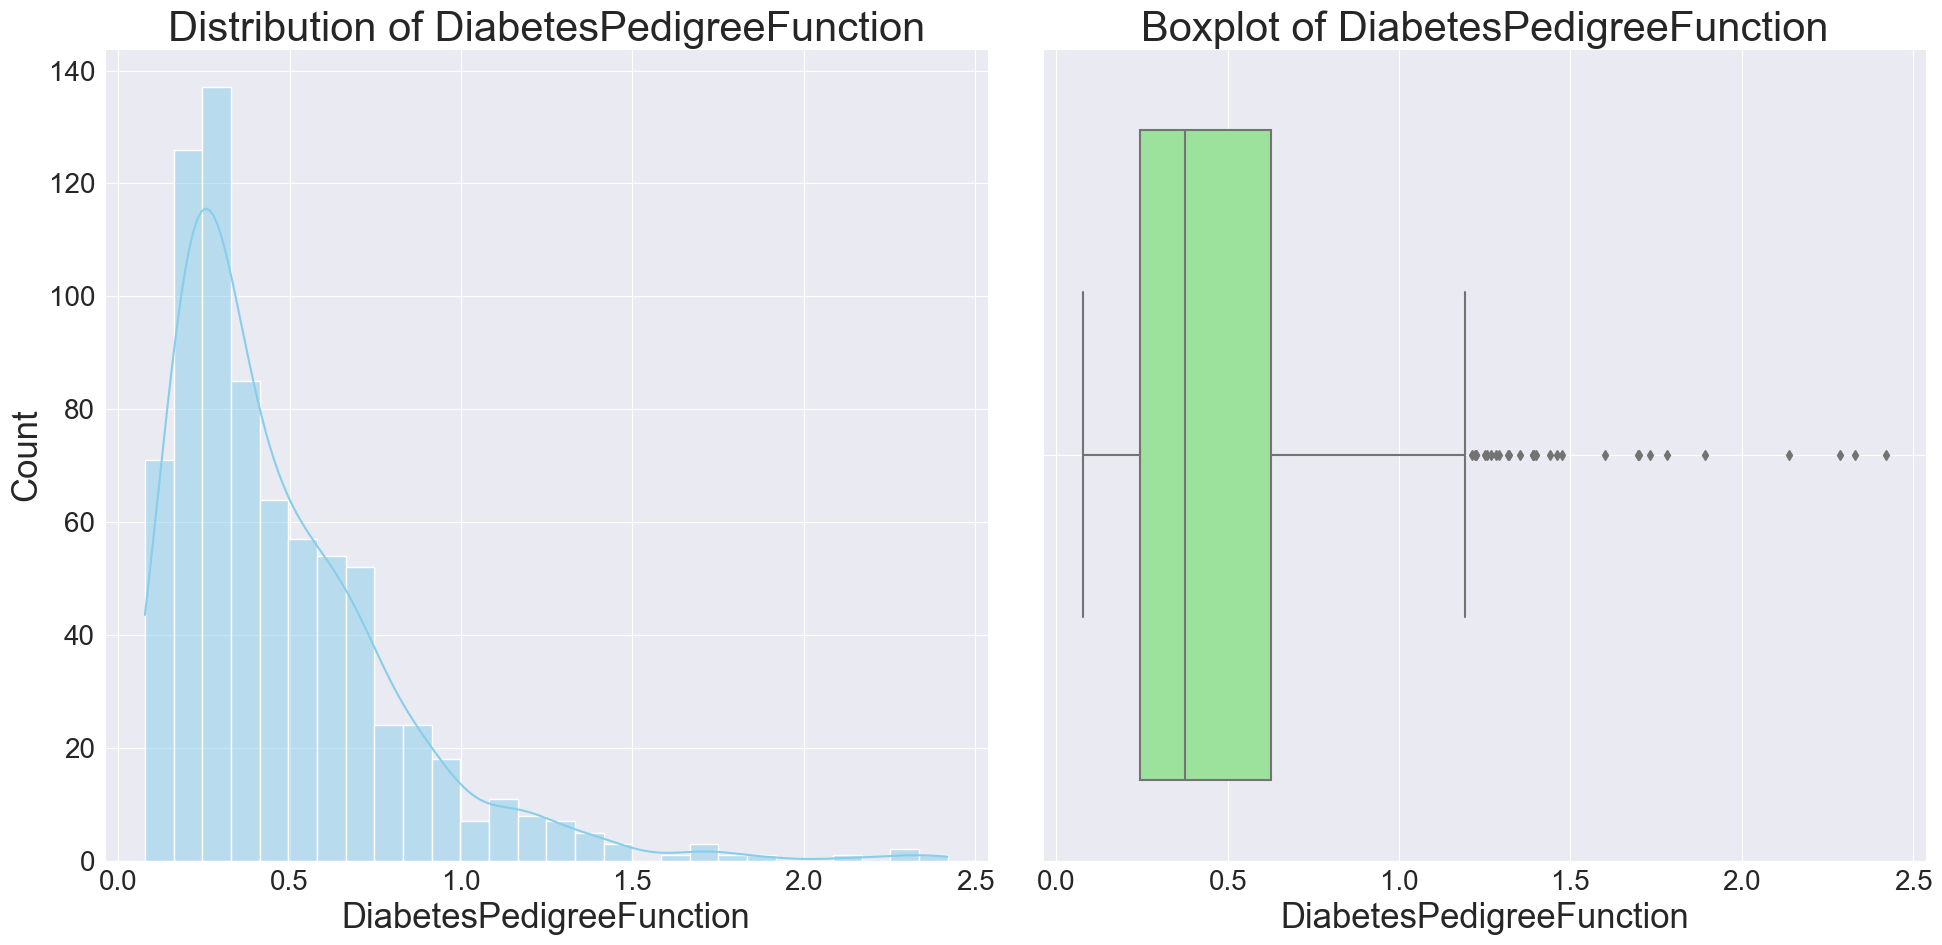

In [237]:
# handeling outliers for DiabetesPedigreeFunction

visualize_distribution(df, 'DiabetesPedigreeFunction')

 **since this column has 0 missing values and the data is again right skewed we can see from the distribution that the box plot's right whisker is longer then the left one so we will use the IQR method to impute the outliers**

In [238]:
df = handle_outliers(df, "DiabetesPedigreeFunction", dist= 'iqr', method='cap')

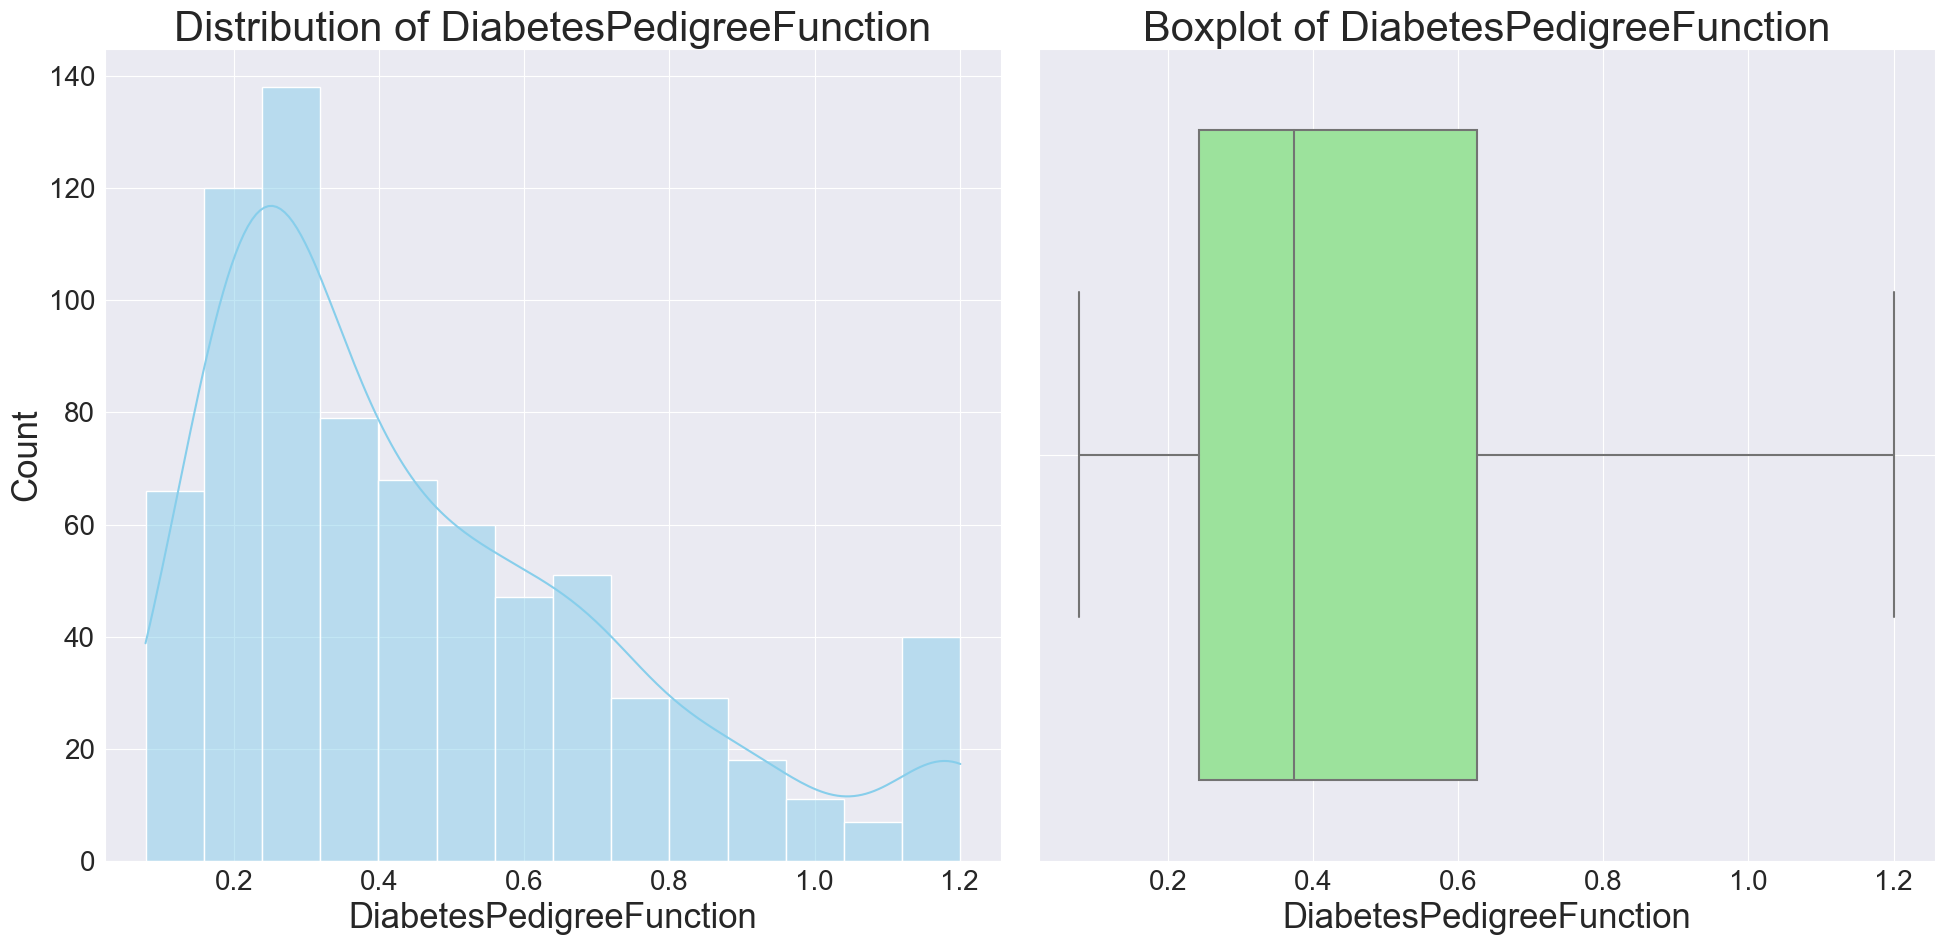

In [239]:
visualize_distribution(df, "DiabetesPedigreeFunction")
# No outliers

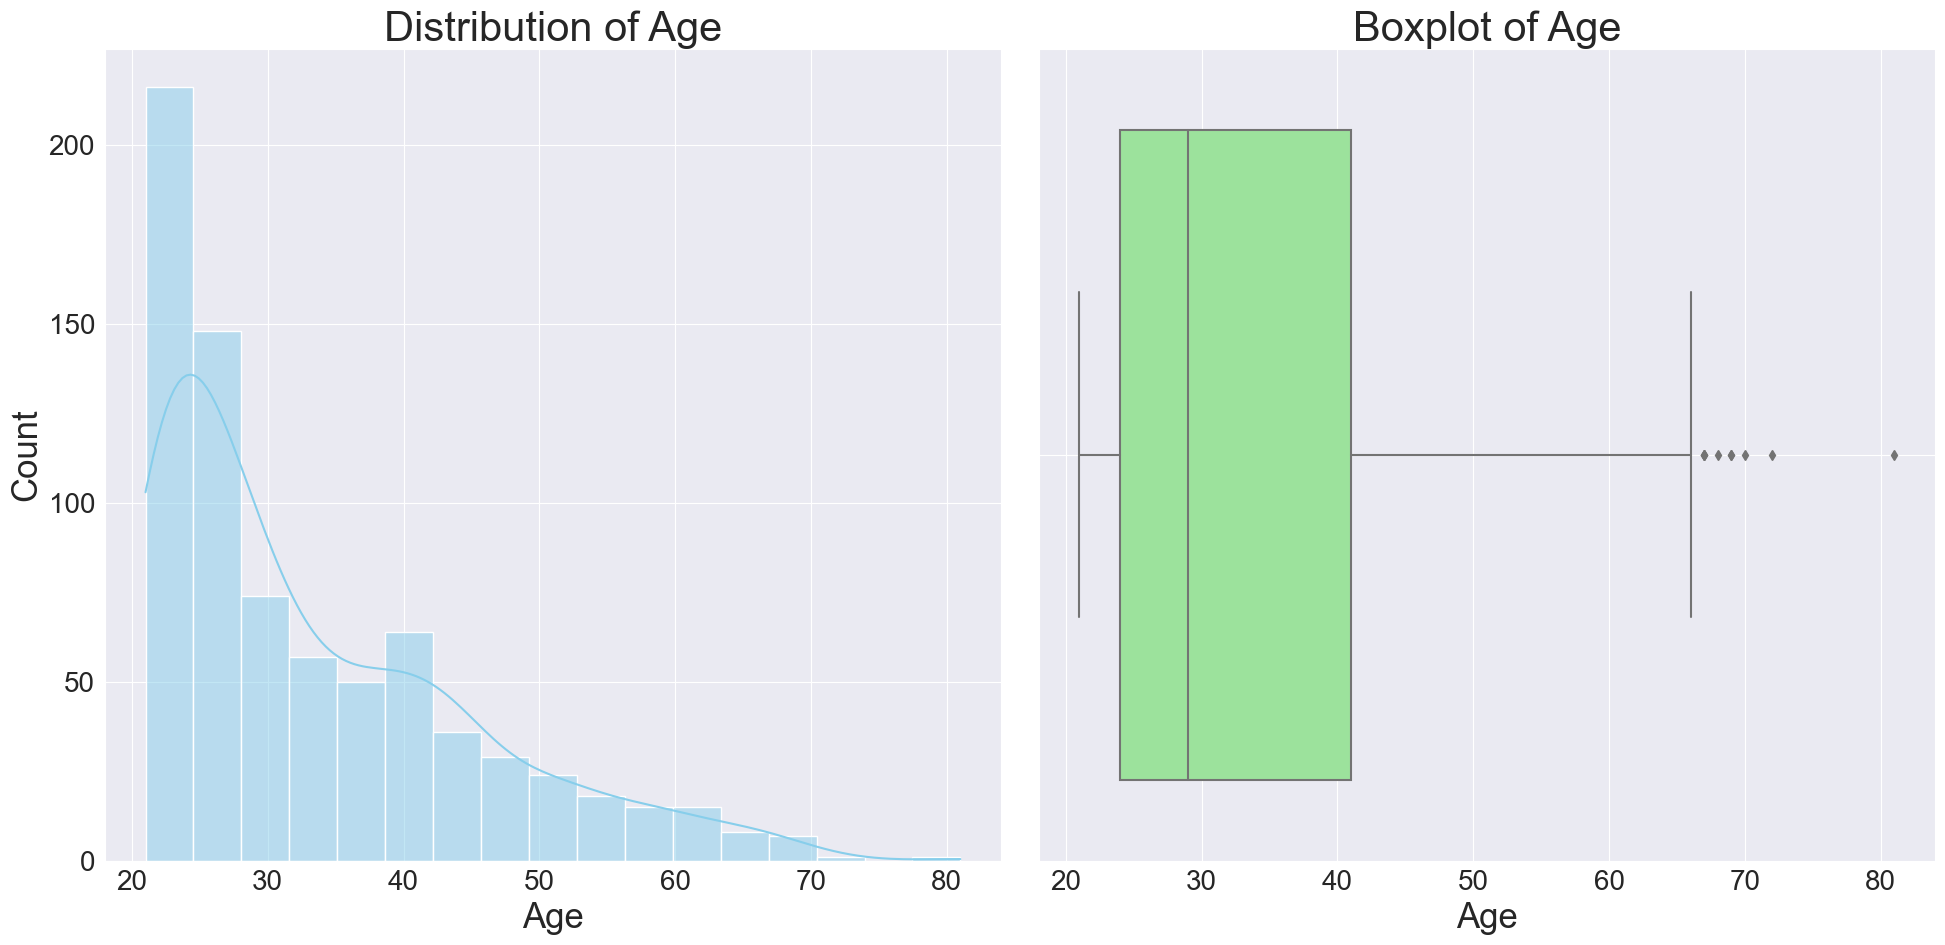

In [240]:
# now the last column ie age
visualize_distribution(df, 'Age')

**we will do the same as we did for the DiabetesPedigreeFunction due to same characteristics of the column**

In [241]:
df = handle_outliers(df, "Age", dist= 'iqr', method='cap')

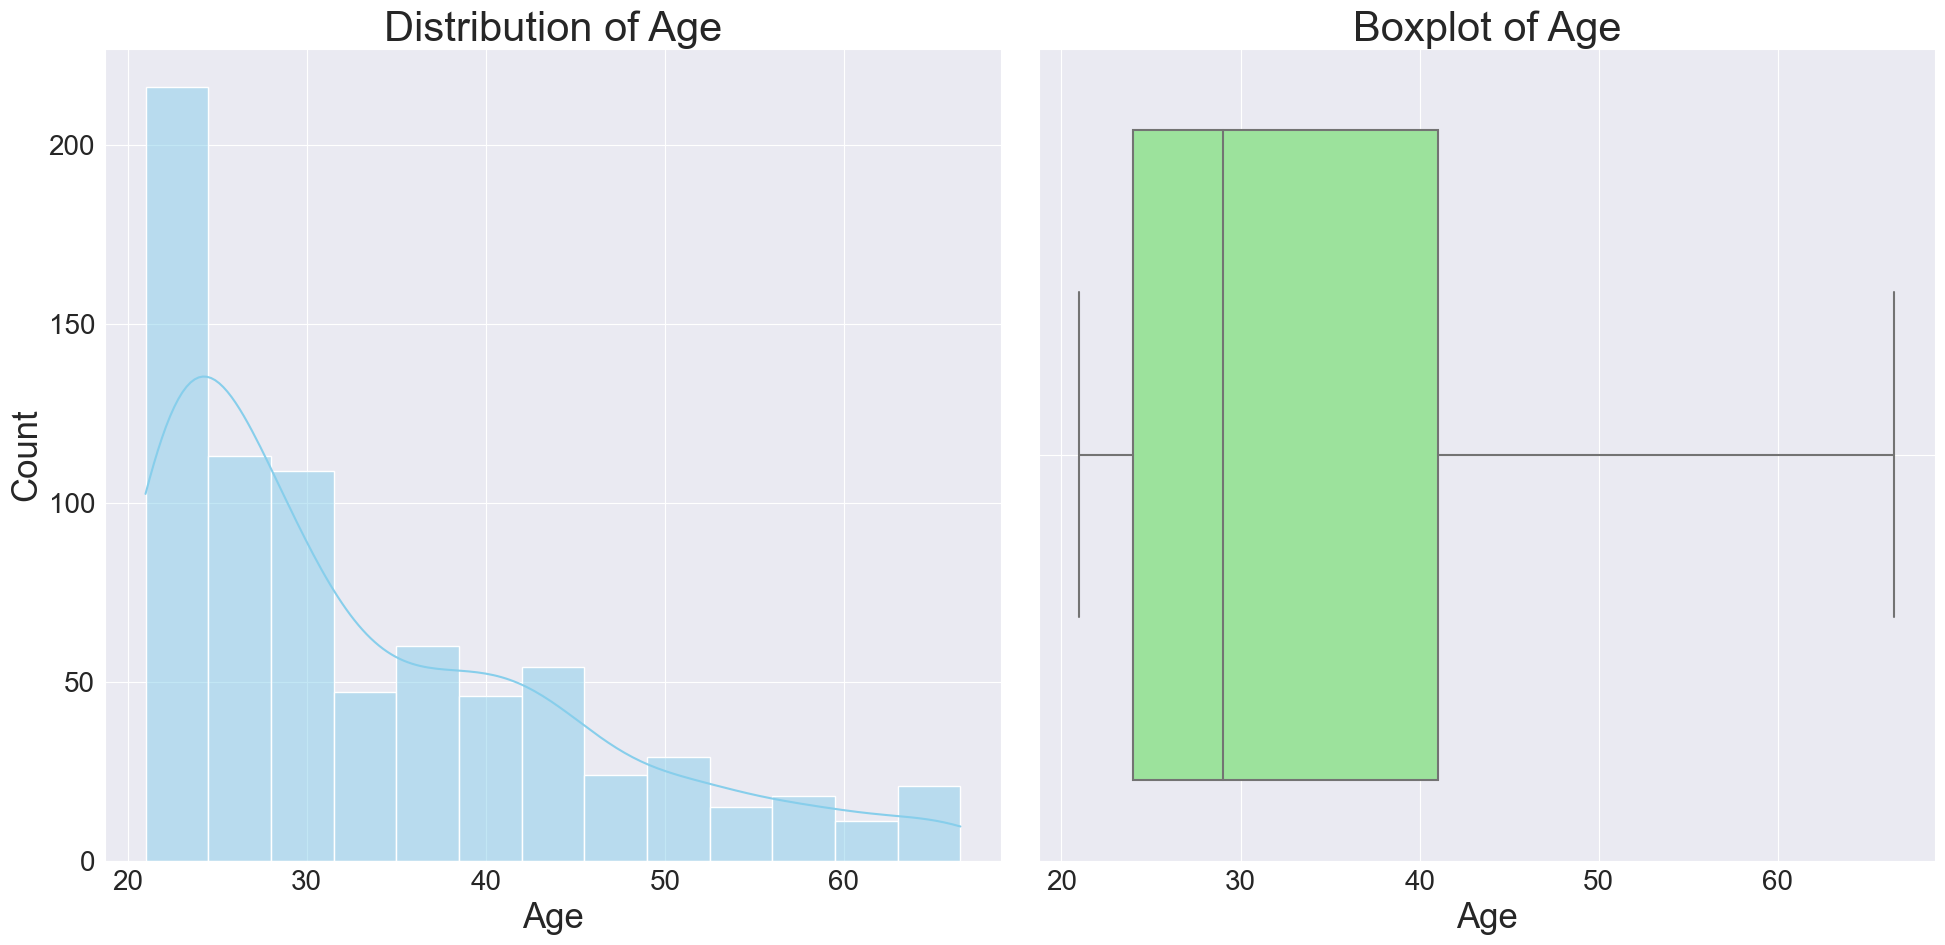

In [242]:
visualize_distribution(df, "Age")
# No outliers

### Conclusion

**here we have successfully applied modern and advance methods of handeling outlies even going further and imputing missing values for more robust analysis and model development**

---

*The End* ✨

#### **Author**
### Ankit Chimariya 📘

---
